<a href="https://colab.research.google.com/github/yxrellx/Algoritmos-con-ARREGLOS/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
import pandas as pd

In [153]:
df = pd.read_csv('/content/conarreglo.csv')
df

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area,quimio_terapia(2),radio_terapia(2)
0,0,75,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,"""""",0,Claudin-low,1,Positve,...,0,0,0,0,0,0,0,0.001280,SI,SI
1,2,43,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1,Positve,...,1,0,0,0,1,1,0,0.000276,SI,SI
2,5,48,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumA,1,Positve,...,1,1,0,0,1,2,1,0.000856,No,No
3,6,47,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1,Positve,...,1,2,0,1,1,2,0,0.001462,No,SI
4,8,76,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1,Positve,...,0,2,0,1,1,1,1,0.002373,No,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,7295,43,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,4,Positve,...,1,1,0,2,1,5,0,0.014624,SI,SI
1900,7296,42,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4,Positve,...,1,5,2,0,0,2,1,0.001159,SI,SI
1901,7297,62,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4,Positve,...,0,8,1,0,1,2,1,0.000658,SI,SI
1902,7298,61,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,4,Positve,...,0,8,2,0,1,4,2,0.000658,SI,No


In [154]:
df =df.drop(['patient_id','type_of_breast_surgery','cancer_type','cancer_type_detailed',"cellularity","pam50_+_claudin-low_subtype","er_status_measured_by_ihc","er_status", "her2_status_measured_by_snp6", "her2_status", "tumor_other_histologic_subtype", "inferred_menopausal_state","integrative_cluster", "primary_tumor_laterality","oncotree_code","pr_status","3-gene_classifier_subtype", "death_from_cancer","quimio_terapia(2)", "radio_terapia(2)"],axis=1)
df

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,her2_status (2),tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area
0,75,0,1,3,1,10,8,0.010013,1.405468e-07,1,...,0,0,0,0,0,0,0,0,0,0.001280
1,43,0,1,3,1,0,2,0.000065,8.466155e-01,1,...,0,0,1,0,0,0,1,1,0,0.000276
2,48,1,1,2,1,1,2,0.000065,1.637546e-07,0,...,0,0,1,1,0,0,1,2,1,0.000856
3,47,1,1,2,1,3,1,0.000065,1.649883e-01,1,...,0,1,1,2,0,1,1,2,0,0.001462
4,76,1,1,3,1,8,2,0.000099,4.138046e-01,0,...,0,1,0,2,0,1,1,1,1,0.002373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,43,0,4,3,1,1,4,0.000082,1.969323e-01,1,...,0,2,1,1,0,2,1,5,0,0.014624
1900,42,0,4,3,0,1,6,0.000082,4.474825e-01,0,...,1,0,1,5,2,0,0,2,1,0.001159
1901,62,0,4,3,1,45,4,0.000099,1.760253e-01,0,...,0,0,0,8,1,0,1,2,1,0.000658
1902,61,0,4,2,1,12,15,0.000082,8.626209e-01,0,...,0,0,0,8,2,0,1,4,2,0.000658


In [155]:
X = df.copy()
X = X.drop(['death_from_cancer (2)'], axis=1)
X

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,her2_status_measured_by_snp6 (2),her2_status (2),tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),tumor_area
0,75,0,1,3,1,10,8,0.010013,1.405468e-07,1,...,0,0,0,0,0,0,0,0,0,0.001280
1,43,0,1,3,1,0,2,0.000065,8.466155e-01,1,...,0,0,0,1,0,0,0,1,1,0.000276
2,48,1,1,2,1,1,2,0.000065,1.637546e-07,0,...,0,0,0,1,1,0,0,1,2,0.000856
3,47,1,1,2,1,3,1,0.000065,1.649883e-01,1,...,0,0,1,1,2,0,1,1,2,0.001462
4,76,1,1,3,1,8,2,0.000099,4.138046e-01,0,...,0,0,1,0,2,0,1,1,1,0.002373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,43,0,4,3,1,1,4,0.000082,1.969323e-01,1,...,0,0,2,1,1,0,2,1,5,0.014624
1900,42,0,4,3,0,1,6,0.000082,4.474825e-01,0,...,2,1,0,1,5,2,0,0,2,0.001159
1901,62,0,4,3,1,45,4,0.000099,1.760253e-01,0,...,0,0,0,0,8,1,0,1,2,0.000658
1902,61,0,4,2,1,12,15,0.000082,8.626209e-01,0,...,0,0,0,0,8,2,0,1,4,0.000658


In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['death_from_cancer (2)'],
                                                    test_size=0.2, random_state=42
                                                    )

In [157]:
X_train

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,her2_status_measured_by_snp6 (2),her2_status (2),tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),tumor_area
1673,70,0,4,1,1,2,2,0.005059,4.534845e-01,1,...,0,0,0,0,6,0,0,0,5,0.020561
1778,83,0,4,3,1,1,5,0.000082,2.900967e-09,0,...,0,0,0,0,0,2,0,0,4,0.018541
339,48,1,1,3,1,0,1,0.006700,7.152384e-09,1,...,2,0,0,1,6,0,0,1,5,0.001220
1315,75,0,3,3,1,1,2,0.000083,2.432477e-01,1,...,2,0,2,0,5,1,2,0,6,0.002373
1278,55,0,3,1,0,0,7,0.000032,1.902301e-01,1,...,0,0,0,0,6,0,0,1,5,0.000428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,53,0,3,2,1,1,5,0.000065,9.473158e-09,1,...,0,0,0,0,1,1,0,1,5,0.001462
1294,74,0,3,2,1,1,3,0.000066,1.420473e-09,0,...,0,0,0,0,8,1,0,0,4,0.002979
860,56,0,3,2,0,0,13,0.000049,3.077359e-01,1,...,0,0,0,0,6,1,0,1,2,0.000579
1459,70,0,3,2,1,0,5,0.000049,1.851951e-01,1,...,0,0,0,0,6,0,0,1,5,0.020282


In [158]:
X_test

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,her2_status_measured_by_snp6 (2),her2_status (2),tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),tumor_area
1225,63,0,3,1,0,0,6,0.000032,1.313438e-08,0,...,0,0,0,0,6,1,0,1,5,0.000579
111,86,1,1,3,1,1,2,0.000082,5.878626e-01,0,...,0,0,0,0,3,0,0,1,4,0.001462
554,56,0,2,2,0,1,8,0.006661,1.538846e-01,0,...,0,0,0,0,1,1,0,0,0,0.000246
526,65,0,2,3,1,0,2,0.006687,2.279426e-01,0,...,2,0,0,0,1,1,0,1,5,0.000488
1313,56,0,3,3,1,0,5,0.000065,1.258086e-01,0,...,0,0,6,0,1,1,0,1,5,0.000428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,65,0,4,3,0,0,2,0.006674,8.026009e-01,1,...,0,0,0,0,4,2,0,0,0,0.008444
583,45,1,2,3,0,8,8,0.000099,1.440480e-09,0,...,2,0,0,1,8,0,0,0,4,0.002194
1866,74,0,4,3,1,5,9,0.000099,3.501167e-09,0,...,2,0,0,0,0,2,0,0,0,0.031037
141,51,0,1,2,1,0,5,0.005032,1.990664e-08,1,...,0,0,0,0,6,1,0,1,5,0.000519


In [159]:
y_train

1673    0
1778    2
339     0
1315    0
1278    0
       ..
1130    0
1294    2
860     0
1459    0
1126    0
Name: death_from_cancer (2), Length: 1523, dtype: int64

In [160]:
y_test

1225    2
111     2
554     2
526     2
1313    1
       ..
1691    0
583     1
1866    2
141     0
1007    1
Name: death_from_cancer (2), Length: 381, dtype: int64

RANDOM FOREST


In [161]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc: 0.8136482939632546
precision: 0.8007746308399902
recall: 0.7891607704402516
f1: 0.8136482939632546


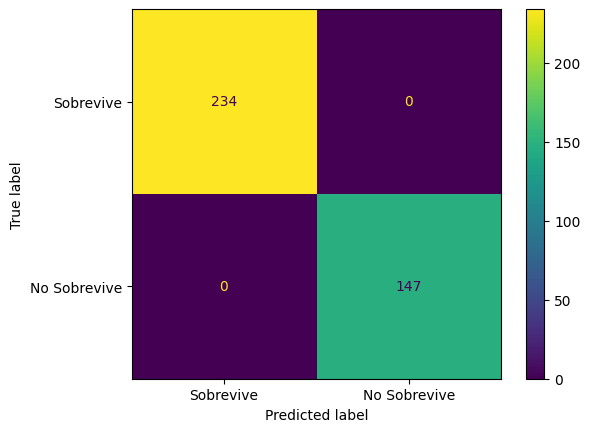

In [162]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion = multilabel_confusion_matrix(y_test,y_pred)
print(f"acc: {accuracy_score(y_test,y_pred)}")
print(f"precision: {precision_score(y_test,y_pred,average='macro')}")
print(f"recall: {recall_score(y_test,y_pred,average='macro')}")
print(f"f1: {f1_score(y_test,y_pred,average='micro')}")
confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['Sobrevive','No Sobrevive']).plot(values_format='d')

MEJORA- Muerte por cancer

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['death_from_cancer (2)'],
                                                    test_size=0.2, random_state=63
                                                    )

In [164]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc: 0.8398950131233596
precision: 0.8195641289166469
recall: 0.8161719233147804
f1: 0.8398950131233596


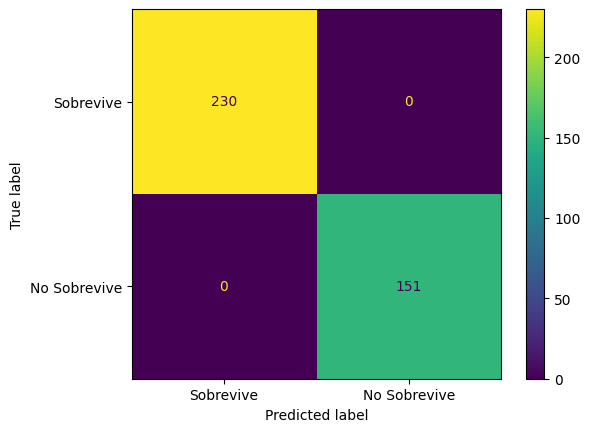

In [165]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion = multilabel_confusion_matrix(y_test,y_pred)
print(f"acc: {accuracy_score(y_test,y_pred)}")
print(f"precision: {precision_score(y_test,y_pred,average='macro')}")
print(f"recall: {recall_score(y_test,y_pred,average='macro')}")
print(f"f1: {f1_score(y_test,y_pred,average='micro')}")
confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['Sobrevive','No Sobrevive']).plot(values_format='d')

Quimioterapia

In [166]:
X = df.copy()
X = X.drop(['chemotherapy'], axis=1)
X

,age_at_diagnosis,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,...,her2_status (2),tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area
0,75,1,3,1,10,8,0.010013,1.405468e-07,1,1,...,0,0,0,0,0,0,0,0,0,0.001280
1,43,1,3,1,0,2,0.000065,8.466155e-01,1,1,...,0,0,1,0,0,0,1,1,0,0.000276
2,48,1,2,1,1,2,0.000065,1.637546e-07,0,0,...,0,0,1,1,0,0,1,2,1,0.000856
3,47,1,2,1,3,1,0.000065,1.649883e-01,1,1,...,0,1,1,2,0,1,1,2,0,0.001462
4,76,1,3,1,8,2,0.000099,4.138046e-01,0,1,...,0,1,0,2,0,1,1,1,1,0.002373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,43,4,3,1,1,4,0.000082,1.969323e-01,1,1,...,0,2,1,1,0,2,1,5,0,0.014624
1900,42,4,3,0,1,6,0.000082,4.474825e-01,0,1,...,1,0,1,5,2,0,0,2,1,0.001159
1901,62,4,3,1,45,4,0.000099,1.760253e-01,0,1,...,0,0,0,8,1,0,1,2,1,0.000658
1902,61,4,2,1,12,15,0.000082,8.626209e-01,0,0,...,0,0,0,8,2,0,1,4,2,0.000658


In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['chemotherapy'],
                                                    test_size=0.2, random_state=42
                                                    )

In [185]:
X_train

,age_at_diagnosis,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,...,her2_status (2),tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area
1234,48,3,2,0,0,6,0.000049,1.765589e-08,1,1,...,1,5,1,1,0,5,1,5,0,0.000428
1588,59,5,1,0,0,6,0.003424,5.848616e-01,0,0,...,0,1,0,6,0,1,1,4,1,0.048695
1486,57,3,2,1,0,8,0.000049,2.107369e-01,0,1,...,0,0,0,0,0,0,0,5,1,0.009411
1153,57,3,3,1,0,6,0.000066,1.537179e-01,0,0,...,0,0,0,5,1,0,0,6,1,0.001068
452,85,1,3,1,1,3,0.008359,9.666556e-01,0,0,...,1,0,0,5,0,0,1,2,1,0.001220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,76,1,3,1,1,3,0.008382,1.157386e-08,0,1,...,0,0,0,10,0,0,0,4,1,0.001644
1418,63,3,3,1,0,9,0.006724,2.000666e-10,1,1,...,0,5,0,3,0,5,0,4,0,0.001644
1606,82,5,2,0,0,4,0.005049,4.201400e-09,0,0,...,0,0,0,6,1,0,1,5,2,0.014751
1089,66,3,2,0,0,9,0.005082,1.654218e-01,1,0,...,0,2,0,1,1,2,0,5,0,0.001948


In [186]:
X_test

,age_at_diagnosis,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,...,her2_status (2),tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area
513,48,2,3,0,3,7,0.000082,2.490830e-09,0,1,...,1,0,1,5,1,0,0,6,1,0.000856
377,76,1,2,1,0,2,0.005079,5.198399e-01,0,1,...,0,0,0,0,1,0,1,5,1,0.001887
145,66,1,2,1,1,4,0.000065,1.850617e-08,1,1,...,0,0,0,0,1,0,1,5,0,0.000856
1365,77,3,8,1,0,2,0.000016,1.040347e-08,0,0,...,0,0,0,2,1,0,1,4,2,0.001462
414,79,1,2,1,1,7,0.006700,1.220073e-01,1,0,...,0,0,0,3,0,0,1,5,0,0.001220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,61,1,3,1,23,1,0.000100,1.110037e-01,1,1,...,0,0,0,0,0,0,0,5,0,0.005834
1696,74,4,2,1,1,5,0.000066,3.134378e-01,0,1,...,0,8,0,0,0,3,0,0,2,0.074484
925,49,3,3,0,0,8,0.000066,2.553518e-01,1,0,...,0,0,1,7,1,0,0,0,0,0.001204
258,56,1,3,0,0,6,0.006720,6.068690e-01,1,1,...,0,0,0,7,1,0,0,0,0,0.001584


In [187]:
y_train

1234    0
1588    0
1486    0
1153    0
452     0
       ..
399     0
1418    0
1606    0
1089    0
205     0
Name: chemotherapy, Length: 1523, dtype: int64

In [188]:
y_test


513     1
377     0
145     0
1365    0
414     0
       ..
355     1
1696    0
925     0
258     1
1874    0
Name: chemotherapy, Length: 381, dtype: int64

In [172]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc: 0.9448818897637795
precision: 0.9315191387559809
recall: 0.9048821548821548
f1: 0.9448818897637795


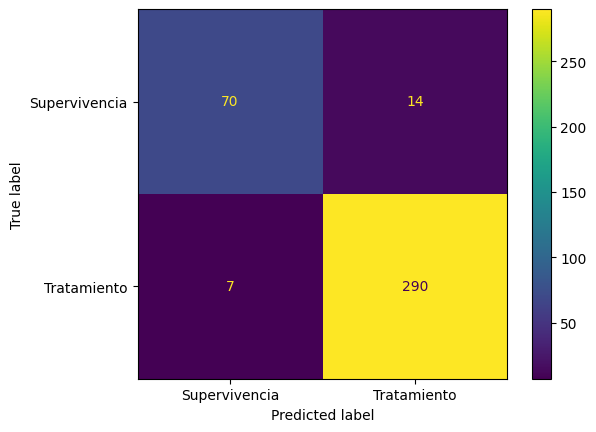

In [173]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion = multilabel_confusion_matrix(y_test,y_pred)
print(f"acc: {accuracy_score(y_test,y_pred)}")
print(f"precision: {precision_score(y_test,y_pred,average='macro')}")
print(f"recall: {recall_score(y_test,y_pred,average='macro')}")
print(f"f1: {f1_score(y_test,y_pred,average='micro')}")
confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['Supervivencia','Tratamiento']).plot(values_format='d')

In [ ]:
MEJORA-quimioterapia

In [184]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['chemotherapy'],
                                                    test_size=0.2, random_state=60
                                                    )

In [189]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc: 0.9606299212598425
precision: 0.957935735150925
recall: 0.9140329254335768
f1: 0.9606299212598425


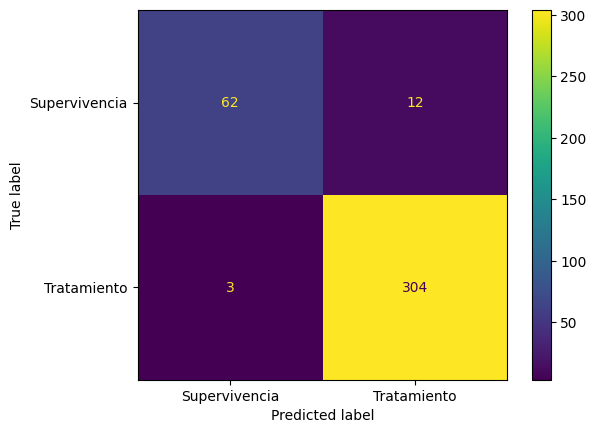

In [190]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion = multilabel_confusion_matrix(y_test,y_pred)
print(f"acc: {accuracy_score(y_test,y_pred)}")
print(f"precision: {precision_score(y_test,y_pred,average='macro')}")
print(f"recall: {recall_score(y_test,y_pred,average='macro')}")
print(f"f1: {f1_score(y_test,y_pred,average='micro')}")
confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['Supervivencia','Tratamiento']).plot(values_format='d')

tumor_otro_subtipo_histológico(2)

In [191]:
X = df.copy()
X = X.drop(['tumor_other_histologic_subtype (2)'], axis=1)
X

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,her2_status_measured_by_snp6 (2),her2_status (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area
0,75,0,1,3,1,10,8,0.010013,1.405468e-07,1,...,0,0,0,0,0,0,0,0,0,0.001280
1,43,0,1,3,1,0,2,0.000065,8.466155e-01,1,...,0,0,1,0,0,0,1,1,0,0.000276
2,48,1,1,2,1,1,2,0.000065,1.637546e-07,0,...,0,0,1,1,0,0,1,2,1,0.000856
3,47,1,1,2,1,3,1,0.000065,1.649883e-01,1,...,0,0,1,2,0,1,1,2,0,0.001462
4,76,1,1,3,1,8,2,0.000099,4.138046e-01,0,...,0,0,0,2,0,1,1,1,1,0.002373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,43,0,4,3,1,1,4,0.000082,1.969323e-01,1,...,0,0,1,1,0,2,1,5,0,0.014624
1900,42,0,4,3,0,1,6,0.000082,4.474825e-01,0,...,2,1,1,5,2,0,0,2,1,0.001159
1901,62,0,4,3,1,45,4,0.000099,1.760253e-01,0,...,0,0,0,8,1,0,1,2,1,0.000658
1902,61,0,4,2,1,12,15,0.000082,8.626209e-01,0,...,0,0,0,8,2,0,1,4,2,0.000658


In [192]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['tumor_other_histologic_subtype (2)'],
                                                    test_size=0.2, random_state=42
                                                    )

In [214]:
X_train

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,her2_status_measured_by_snp6 (2),her2_status (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area
1612,66,1,5,3,0,31,4,0.000098,3.547849e-01,0,...,2,1,0,5,1,0,1,0,1,0.004141
415,58,0,1,2,1,0,3,0.005032,1.146382e-08,1,...,2,0,0,6,0,2,1,5,0,0.000519
1244,69,0,3,3,1,0,5,0.000066,2.169390e-01,0,...,0,0,0,10,1,0,1,4,1,0.002373
1213,73,0,3,2,1,0,2,0.000049,9.699900e-01,0,...,0,0,0,6,0,0,1,5,2,0.000579
1043,41,0,3,1,0,0,5,0.003318,1.974992e-01,1,...,0,0,1,0,1,1,1,5,0,0.000003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,42,0,2,2,0,0,3,0.005012,2.721907e-08,1,...,0,0,1,8,0,0,0,5,0,0.000337
968,38,1,3,3,0,3,7,0.000082,2.740914e-09,0,...,0,0,1,7,1,0,0,0,1,0.000248
295,56,1,1,3,0,0,4,0.006710,7.229076e-01,1,...,0,0,0,7,0,0,0,0,0,0.001402
666,50,0,2,1,0,0,9,0.003374,1.239413e-08,1,...,0,0,0,1,1,0,1,5,0,0.000519


In [215]:
X_test

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,her2_status_measured_by_snp6 (2),her2_status (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area
1380,64,0,3,3,1,1,3,0.000082,9.083028e-09,0,...,2,1,0,5,0,0,0,6,1,0.001159
1193,50,0,3,8,1,3,2,0.003374,1.947649e-08,0,...,0,0,0,0,0,0,1,5,2,0.000467
240,72,0,1,3,0,1,3,0.008365,1.432144e-01,1,...,0,0,0,7,0,0,1,0,0,0.001341
868,51,0,3,1,1,0,7,0.000032,2.798933e-08,1,...,0,0,0,6,1,1,1,2,0,0.001766
368,67,0,1,3,1,0,2,0.000065,1.474158e-01,0,...,0,0,0,8,0,0,0,4,2,0.000579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,76,0,3,3,1,4,7,0.000098,4.844948e-01,0,...,2,1,0,8,1,1,0,4,1,0.000522
826,76,0,3,1,0,0,3,0.000033,2.656552e-01,0,...,0,0,0,3,1,0,1,4,2,0.001341
1320,35,1,3,3,1,7,9,0.000099,1.020340e-08,0,...,0,0,1,6,0,0,1,5,1,0.002676
528,59,0,2,2,0,0,4,0.000049,1.600534e-08,1,...,0,0,0,3,1,2,1,4,0,0.000428


In [216]:
y_train

1612    0
415     2
1244    0
1213    0
1043    1
       ..
541     0
968     0
295     0
666     0
461     0
Name: tumor_other_histologic_subtype (2), Length: 1523, dtype: int64

In [217]:
y_test

1380    0
1193    0
240     0
868     1
368     0
       ..
1428    1
826     0
1320    0
528     2
658     0
Name: tumor_other_histologic_subtype (2), Length: 381, dtype: int64

In [197]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc: 0.952755905511811
precision: 0.6442913501737031
recall: 0.47804232804232805
f1: 0.952755905511811


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


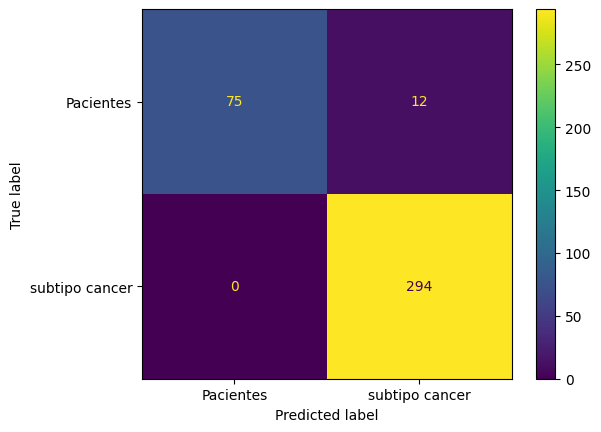

In [198]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion = multilabel_confusion_matrix(y_test,y_pred)
print(f"acc: {accuracy_score(y_test,y_pred)}")
print(f"precision: {precision_score(y_test,y_pred,average='macro')}")
print(f"recall: {recall_score(y_test,y_pred,average='macro')}")
print(f"f1: {f1_score(y_test,y_pred,average='micro')}")
confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['Pacientes','subtipo cancer']).plot(values_format='d')

MEJORA-tumor_otro_subtipo_histológico(2)

In [213]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['tumor_other_histologic_subtype (2)'],
                                                    test_size=0.2, random_state=55
                                                    )

In [218]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc: 0.9606299212598425
precision: 0.40634428427757285
recall: 0.4084587323301413
f1: 0.9606299212598425


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


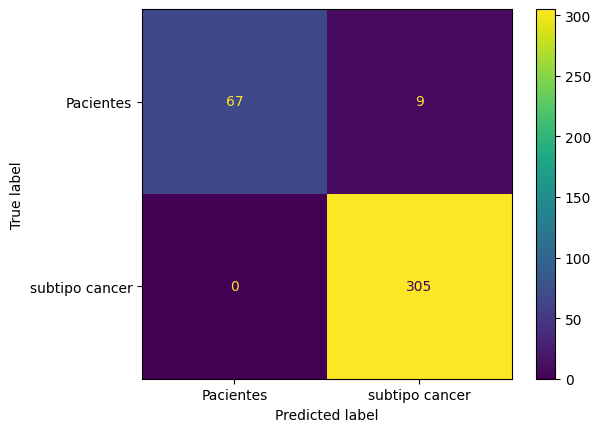

In [219]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion = multilabel_confusion_matrix(y_test,y_pred)
print(f"acc: {accuracy_score(y_test,y_pred)}")
print(f"precision: {precision_score(y_test,y_pred,average='macro')}")
print(f"recall: {recall_score(y_test,y_pred,average='macro')}")
print(f"f1: {f1_score(y_test,y_pred,average='micro')}")
confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['Pacientes','subtipo cancer']).plot(values_format='d')